# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
type(pd.read_csv('craftcans.csv'))

pandas.core.frame.DataFrame

In [4]:
df = pd.read_csv('craftcans.csv')

In [5]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [6]:
df.shape

(2416, 7)

In [7]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [8]:
df.groupby(by='Brewery').count().head(10)

,Beer,Location,Style,Size,ABV,IBUs
Brewery,,,,,,
10 Barrel Brewing Company,1,1,1,1,1,1
18th Street Brewery,14,14,14,14,14,14
2 Towns Ciderhouse,4,4,4,4,4,4
21st Amendment Brewery,20,20,20,20,20,20
3 Daughters Brewing,3,3,3,3,3,3
4 Hands Brewing Company,8,8,8,8,8,8
450 North Brewing Company,7,7,7,7,7,7
7 Seas Brewing Company,4,4,4,4,4,4
7venth Sun,1,1,1,1,1,1


In [9]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [10]:
df.ABV.value_counts()

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
7.00%      92
4.50%      89
4.80%      72
5.80%      66
5.60%      66
5.10%      62
5.30%      60
6.20%      59
4.90%      59
4.70%      57
8.00%      57
5.70%      52
6.80%      52
5.40%      50
7.50%      43
6.30%      38
4.00%      38
4.20%      38
7.20%      37
9.90%      35
5.90%      34
6.90%      32
4.60%      32
8.50%      26
6.70%      25
         ... 
4.10%       9
9.50%       9
7.40%       8
8.30%       8
7.90%       7
8.80%       6
3.80%       6
3.50%       6
9.60%       5
9.30%       5
9.70%       5
7.60%       5
8.10%       4
3.70%       4
8.60%       4
9.80%       3
9.10%       3
8.40%       3
3.20%       3
8.90%       2
2.70%       2
12.00%      1
12.80%      1
2.80%       1
10.40%      1
9.40%       1
3.40%       1
0.10%       1
10.00%      1
12.50%      1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [11]:
df.ABV

0        4.50%
1        4.90%
2        4.80%
3        6.00%
4        6.00%
5        5.60%
6        8.00%
7       12.50%
8        7.70%
9        4.20%
10       5.00%
11       6.60%
12       4.00%
13       5.50%
14       7.60%
15       5.10%
16       6.50%
17       6.00%
18       5.00%
19       5.20%
20       4.80%
21       7.20%
22       6.70%
23       4.90%
24       8.00%
25       7.50%
26       6.00%
27       8.00%
28       6.30%
29       5.80%
         ...  
2386     5.70%
2387     6.20%
2388     4.90%
2389     9.90%
2390     6.20%
2391     5.80%
2392     5.20%
2393     8.50%
2394     7.00%
2395     5.30%
2396     5.60%
2397     4.90%
2398     5.10%
2399     4.00%
2400     5.50%
2401     5.10%
2402     5.10%
2403     9.70%
2404     5.10%
2405     6.70%
2406     6.20%
2407     8.30%
2408     7.00%
2409     4.90%
2410     9.90%
2411     5.30%
2412     9.90%
2413     8.00%
2414     8.70%
2415     6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [12]:
df['ABV'] = df.ABV.str.replace('%', ' ')

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [13]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

In [14]:
df['ABV']=df['ABV'].astype(float)



In [15]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [16]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

In [17]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

Beer
#001 Golden Amber Lager                   AxesSubplot(0.125,0.125;0.775x0.755)
#002 American I.P.A.                      AxesSubplot(0.125,0.125;0.775x0.755)
#003 Brown & Robust Porter                AxesSubplot(0.125,0.125;0.775x0.755)
#004 Session I.P.A.                       AxesSubplot(0.125,0.125;0.775x0.755)
#9                                        AxesSubplot(0.125,0.125;0.775x0.755)
(12 oz.)                                  AxesSubplot(0.125,0.125;0.775x0.755)
(16 oz.) (2010)                           AxesSubplot(0.125,0.125;0.775x0.755)
(24 oz.)                                  AxesSubplot(0.125,0.125;0.775x0.755)
077XX                                     AxesSubplot(0.125,0.125;0.775x0.755)
10 Degrees of Separation                  AxesSubplot(0.125,0.125;0.775x0.755)
10 Ton                                    AxesSubplot(0.125,0.125;0.775x0.755)
113 IPA                                   AxesSubplot(0.125,0.125;0.775x0.755)
11th Hour IPA                             AxesS

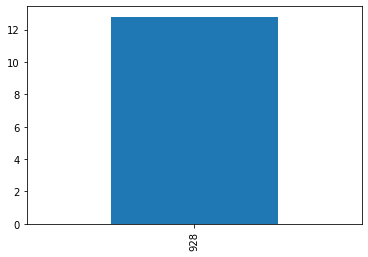

In [18]:
df.groupby(by='Beer').ABV.plot(kind='bar')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [19]:
df[df.ABV.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,Does not apply
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,Does not apply
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,Does not apply
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,Does not apply
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,Does not apply
217,U. P. Witbier,Keweenaw Brewing Company,"Houghton, MI",Witbier,12 oz.,NaN,Does not apply
307,Fat Paczki,Brewery Vivant,"Grand Rapids, MI",Belgian Dark Ale,16 oz.,NaN,Does not apply
308,Earth-Like Planets,Brewery Vivant,"Grand Rapids, MI",Belgian Pale Ale,16 oz.,NaN,Does not apply
324,Royal Lager,Weston Brewing Company,"Weston, MO",American Pale Lager,16 oz.,NaN,Does not apply
344,O’Malley’s Stout,Weston Brewing Company,"Weston, MO",English Stout,12 oz.,NaN,Does not apply


In [20]:
df.ABV.isna().sum()

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

In [21]:
Brooklyn = df[df.Location == 'Brooklyn, NY'].Beer.value_counts().sum() 

In [22]:
df.Beer.count()

2416

In [23]:
Brooklyn / df.Beer.count() * 100

1.5728476821192054

## What are the top 10 cities in the US for canned craft beer?

In [24]:
df.groupby(by='Location').count().head(10)

,Beer,Brewery,Style,Size,ABV,IBUs
Location,,,,,,
"Abingdon, VA",1,1,1,1,1,1
"Abita Springs, LA",3,3,3,3,3,3
"Ada, MI",1,1,1,1,1,1
"Afton, VA",4,4,4,4,4,4
"Airway Heights, WA",5,5,5,5,5,5
"Albuquerque, NM",7,7,7,7,7,7
"Alpine, TX",5,5,5,5,5,5
"Anchorage, AK",15,15,15,15,15,15
"Angola, IN",4,4,4,4,4,4


## List all of the beer from Brooklyn, NY

In [25]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [26]:
df[df.Location == 'Brooklyn, NY'].sort_values(by='Beer').max()


Beer              The Crisp (2011)
Brewery        Sixpoint Craft Ales
Location              Brooklyn, NY
Style       Saison / Farmhouse Ale
Size             24 oz. "Silo Can"
ABV                             10
IBUs                Does not apply
dtype: object

## What are the five most popular styles of beer produced by Sixpoint?

In [27]:
df[df.Brewery == 'Sixpoint Craft Ales'].sort_values(by='Beer').head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1624,3Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,9.9,85
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
1970,Apollo,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Wheat Ale,16 oz.,5.2,11
2074,Autumnation (2011-12) (2011),Sixpoint Craft Ales,"Brooklyn, NY",Pumpkin Ale,16 oz.,6.0,48


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [28]:
df.Location.isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2386    False
2387    False
2388    False
2389    False
2390    False
2391    False
2392    False
2393    False
2394    False
2395    False
2396    False
2397    False
2398    False
2399    False
2400    False
2401    False
2402    False
2403    False
2404    False
2405    False
2406    False
2407    False
2408    False
2409    False
2410    False
2411    False
2412    False
2413    False
2414    False
2415    False
Name: Location, Length: 2416, dtype: bool

In [29]:
df[df.Location.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2025,12 oz.,NaN,NaN,NaN,NaN,NaN,NaN
2160,(24 oz.),NaN,NaN,NaN,NaN,NaN,NaN
2226,(12 oz.),NaN,NaN,NaN,NaN,NaN,NaN
2276,(12 oz.),NaN,NaN,NaN,NaN,NaN,NaN
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN
2376,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#every time Location is missing data it adds 1 [False 0, True 1]
df.Location.isna().sum()

6

In [31]:
df = df.dropna(subset=['Location'])

In [32]:
df[df.Location.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs


In [33]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

In [34]:
df.Location.str.replace('NY', 'New York State')
df['Location'] = df.Location.str.replace('NY', 'New York State')

In [35]:
df[df.Location == 'New York State'].count()

Beer        0
Brewery     0
Location    0
Style       0
Size        0
ABV         0
IBUs        0
dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [36]:
df[df.Style.str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,Does not apply
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,Does not apply


In [37]:
df[df.Style.str.contains('IPA', na=False)].count()

Beer        571
Brewery     571
Location    571
Style       571
Size        571
ABV         560
IBUs        571
dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [38]:
df.IBUs

0                   50
1                   26
2                   19
3                   38
4                   25
5                   47
6                   68
7                   80
8                   25
9                   42
10                  25
11                  21
12                  13
13                  17
14                  68
15                  38
16      Does not apply
17                  65
18                  20
19                  18
20                  15
21                  80
22                  65
23                  45
24                 100
25                  85
26                  24
27                 100
28                  30
29                  28
             ...      
2386                30
2387                65
2388    Does not apply
2389    Does not apply
2390                42
2391                35
2392                40
2393    Does not apply
2394               113
2395                21
2396                11
2397                44
2398       

In [39]:
df['IBUs'] = df.IBUs.replace('Does not apply', np.nan)
df.IBUs.astype(float)
df.IBUs.median()



35.0

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [44]:
df.IBUs.median()

35.0

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

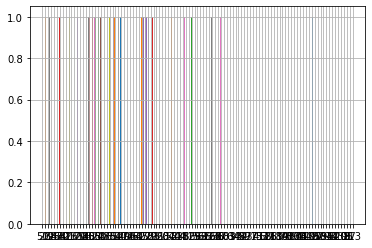

In [53]:
df.IBUs.hist(bins=10)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

count     1405
unique     107
top         20
freq        82
Name: IBUs, dtype: object

## List all of the beers with IBUs below the 25th percentile

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [56]:
df.IBUs.sort_values()

343      10
1502     10
2144     10
1477     10
1411     10
167      10
183      10
56       10
1771     10
1988     10
1979     10
999      10
2312     10
310      10
377      10
254      10
748      10
1109     10
274     100
2412    100
518     100
1966    100
1781    100
1216    100
110     100
1489    100
1046    100
372     100
584     100
1757    100
       ... 
2336    NaN
2337    NaN
2341    NaN
2342    NaN
2343    NaN
2344    NaN
2346    NaN
2347    NaN
2350    NaN
2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
2356    NaN
2357    NaN
2358    NaN
2359    NaN
2360    NaN
2364    NaN
2365    NaN
2366    NaN
2367    NaN
2373    NaN
2377    NaN
2378    NaN
2379    NaN
2388    NaN
2389    NaN
2393    NaN
Name: IBUs, Length: 2410, dtype: object

In [60]:
groupby('Style')['IBUs'].medi

NameError: name 'groupby' is not defined

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.